# Drugs200 Dataset End to End project - Utkarsh Gaikwad

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

### Step 2 : Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

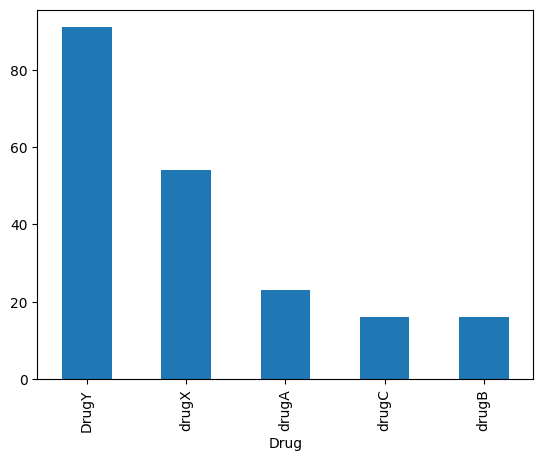

In [7]:
df['Drug'].value_counts().plot(kind='bar')

### Step 3 : Seperate X and Y(drug)

In [8]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [9]:
X.head()

Age Sex      BP Cholesterol  Na_to_K
0   23   F    HIGH        HIGH   25.355
1   47   M     LOW        HIGH   13.093
2   47   M     LOW        HIGH   10.114
3   28   F  NORMAL        HIGH    7.798
4   61   F     LOW        HIGH   18.043

In [10]:
Y.head()

Drug
0  DrugY
1  drugC
2  drugC
3  drugX
4  DrugY

### Step 3: Preprocess the data for X 

In [11]:
# Seperate cat and con features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Sex', 'BP', 'Cholesterol']

In [13]:
con

['Age', 'Na_to_K']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

num__Age  num__Na_to_K  cat__Sex_F  cat__Sex_M  cat__BP_HIGH  cat__BP_LOW  \
0 -1.291591      1.286522         1.0         0.0           1.0          0.0   
1  0.162699     -0.415145         0.0         1.0           0.0          1.0   
2  0.162699     -0.828558         0.0         1.0           0.0          1.0   
3 -0.988614     -1.149963         1.0         0.0           0.0          0.0   
4  1.011034      0.271794         1.0         0.0           0.0          1.0   

   cat__BP_NORMAL  cat__Cholesterol_HIGH  cat__Cholesterol_NORMAL  
0             0.0                    1.0                      0.0  
1             0.0                    1.0                      0.0  
2             0.0                    1.0                      0.0  
3             1.0                    1.0                      0.0  
4             0.0                    1.0                      0.0

### Save the pipeline for use in application

In [20]:
import pickle
with open('pipe.pkl', 'wb') as file1:
    pickle.dump(pre, file1)

### Train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3,
                                                random_state=42)

In [22]:
xtrain.head()

num__Age  num__Na_to_K  cat__Sex_F  cat__Sex_M  cat__BP_HIGH  \
169 -1.473377     -0.669244         1.0         0.0           1.0   
97   0.708057      1.292073         1.0         0.0           1.0   
31   1.798775     -0.904468         0.0         1.0           1.0   
12  -0.079683     -0.098320         0.0         1.0           0.0   
35   0.102103     -1.221155         0.0         1.0           0.0   

     cat__BP_LOW  cat__BP_NORMAL  cat__Cholesterol_HIGH  \
169          0.0             0.0                    1.0   
97           0.0             0.0                    1.0   
31           0.0             0.0                    1.0   
12           1.0             0.0                    1.0   
35           0.0             1.0                    0.0   

     cat__Cholesterol_NORMAL  
169                      0.0  
97                       0.0  
31                       0.0  
12                       0.0  
35                       1.0

In [23]:
ytrain.head()

Drug
169  drugA
97   DrugY
31   drugB
12   DrugY
35   drugX

In [24]:
xtest.head()

num__Age  num__Na_to_K  cat__Sex_F  cat__Sex_M  cat__BP_HIGH  \
95  -0.503851     -0.646762         0.0         1.0           0.0   
15  -1.715759     -0.078892         1.0         0.0           1.0   
30  -1.594568     -1.017848         1.0         0.0           0.0   
158  0.889843     -0.782762         1.0         0.0           0.0   
128  0.162699      2.422679         0.0         1.0           0.0   

     cat__BP_LOW  cat__BP_NORMAL  cat__Cholesterol_HIGH  \
95           1.0             0.0                    0.0   
15           0.0             0.0                    0.0   
30           0.0             1.0                    0.0   
158          1.0             0.0                    1.0   
128          1.0             0.0                    0.0   

     cat__Cholesterol_NORMAL  
95                       1.0  
15                       1.0  
30                       1.0  
158                      0.0  
128                      1.0

In [26]:
ytest.head()

Drug
95   drugX
15   DrugY
30   drugX
158  drugC
128  DrugY

In [27]:
ytrain.value_counts()

Drug 
DrugY    65
drugX    36
drugA    16
drugB    13
drugC    10
Name: count, dtype: int64

In [28]:
ytest.value_counts()

Drug 
DrugY    26
drugX    18
drugA     7
drugC     6
drugB     3
Name: count, dtype: int64

In [29]:
xtrain.shape

(140, 9)

In [30]:
xtest.shape

(60, 9)

### Step 4 : Create a random forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

### Step 5 : Evaluate model in train and test

In [32]:
model.score(xtrain, ytrain)

1.0

In [33]:
model.score(xtest, ytest)

1.0

In [35]:
# Predict results for train and test
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [36]:
ytrain.head()

Drug
169  drugA
97   DrugY
31   drugB
12   DrugY
35   drugX

In [37]:
ypred_tr[0:5]

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX'], dtype=object)

In [38]:
ytest.head()

Drug
95   drugX
15   DrugY
30   drugX
158  drugC
128  DrugY

In [39]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

### Plot the confusion matrix for test

In [40]:
model.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

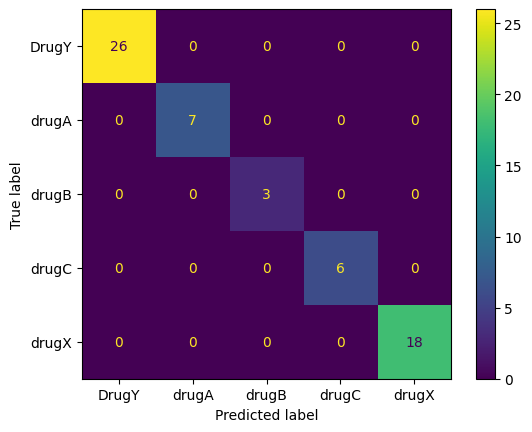

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

### Print classification report for test

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### Cross validate f1 score in training

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([1.        , 1.        , 1.        , 0.93142857, 1.        ])

In [47]:
scores.mean()

0.9862857142857143

### Cross validated f1 score > 0.8 hence its a good model

### Save the model to use in application

In [48]:
with open('model.pkl', 'wb') as file2:
    pickle.dump(model, file2)